<a href="https://colab.research.google.com/github/haima2209/ML-project/blob/main/GoldPriceML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

**DATA COLLECTION AND PROCESSING**

In [3]:
gold_data=pd.read_csv('/content/gld_price_data.csv')


In [6]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [9]:
gold_data.shape

(2290, 6)

In [10]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
gold_data.isnull().sum()#any empty value or not

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [12]:
gold_data.describe()#statistical measure

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


correlation:
1.Positive Correlation
2.Negative Correlation

In [17]:
correlation=gold_data.corr()

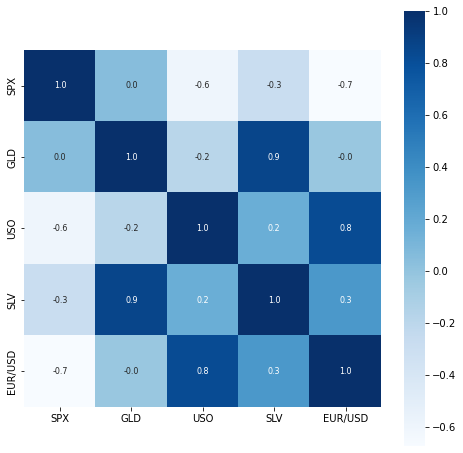

In [23]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [25]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


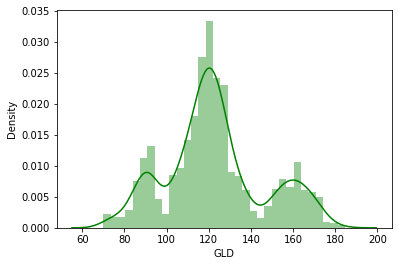

In [28]:
sns.distplot(gold_data['GLD'],color='green')

Splitting features and target

In [29]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [30]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [31]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training and test data

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

Model Training

In [33]:
regressor=RandomForestRegressor(n_estimators=100)

In [34]:
regressor.fit(X_train,Y_train)#training model

RandomForestRegressor()

Model evaluation

In [35]:
test_data_prediction=regressor.predict(X_test)

In [36]:
print(test_data_prediction)

[168.55039948  81.79659972 115.81700037 127.73490077 120.73060144
 154.76979767 150.62139913 126.07520008 117.58819865 125.95680059
 116.67840099 172.1085011  141.74799883 167.50849822 115.12380009
 118.15660063 137.93420334 169.85150048 159.91530327 159.15239843
 155.12610006 125.05260023 176.17879972 158.15630344 125.21170044
  93.98459942  77.73170035 120.34959986 119.04539905 167.41969982
  88.20300048 125.24040036  91.13390101 117.8038002  121.17909896
 136.17480156 115.60460108 114.90860072 147.02529953 106.89530085
 104.42860238  87.18389769 126.50770082 117.7712999  154.08679874
 119.55300001 108.38150001 108.14999841  93.15920081 127.11669751
  74.82850048 113.51449901 121.15560002 111.18039957 118.94009907
 120.57049926 158.6679003  166.52460097 146.98169694  85.64329823
  94.35760022  86.69839892  90.45280009 119.07470119 126.47890069
 127.61589993 169.60700004 122.33299933 117.51559909  98.4072006
 168.11990113 143.39719853 132.05610251 121.20280193 120.90089928
 119.711700

In [38]:
#R squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R-squared error:",error_score)



R-squared error: 0.9895380921650556


Compare actual values and predicted values


In [39]:
Y_test=list(Y_test)

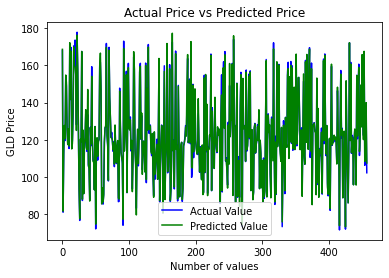

In [40]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()